# **Info and Imports**

In [94]:
# Gets Machine specs and Drivers
!nvidia-smi
# !cat /proc/cpuinfo
# !cat /proc/meminfo

Fri Apr 26 20:10:49 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   60C    P0              26W /  70W |    707MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [95]:
# Base imports
import keras
import tensorflow as tf
print('Keras:', keras.__version__,'\nTensorflow:', tf.__version__)

Keras: 2.15.0 
Tensorflow: 2.15.0


In [96]:
# Visual imports. np to create the arrays for plt, plt to actually plot the data/images,
# sns for styling
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Importing Dataset and Analysis**

In [97]:
# Gets the fashion dataset from Keras
mnist = tf.keras.datasets.fashion_mnist

# Creates training and testing data as Tuples, then loads data from MNIST
# In this context, x = images and y = labels that are assigned to the images
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [98]:
# Here there are 60k training images
print('Training Images: ',x_train.shape)
print('Training Labels: ',y_train.shape)

Training Images:  (60000, 28, 28)
Training Labels:  (60000,)


In [99]:
# Here there are only 10k testing images
print('Testing Images: ',x_test.shape)
print('Testing Labels: ',y_test.shape)

Testing Images:  (10000, 28, 28)
Testing Labels:  (10000,)


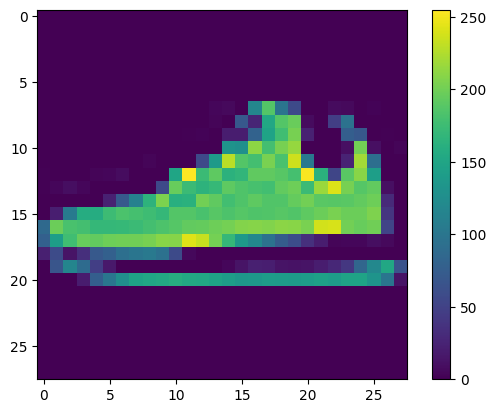

In [100]:
# Here plt is going to help us understand the pixels values
# that the Machine Model will be seeing and identifying
plt.figure() # Creates a plot
plt.imshow(x_train[27627]) # Grabs the image from the given postion in training array and sets it in the plot
plt.colorbar() # Create a 'heatmap' bar
plt.show() # Outputs the current plot

In [101]:
fash_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

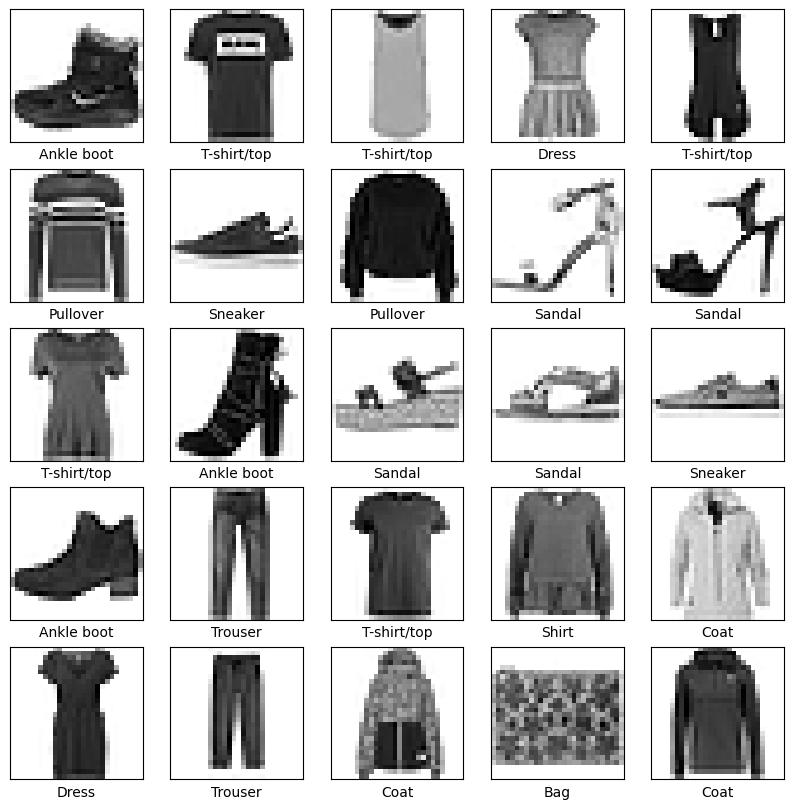

In [102]:
# Now an array of some images will be generated to confirm the value and labels are accurate
plt.figure(figsize=(10,10)) # Creates a plot of size 10 x 10
for i in range (25) :
  plt.subplot(5,5,i+1) # Creates an array[5,5] of subplots. i+1 represents the current plot to display
  plt.xticks([]) # Sets the tick values to a null value, meaning nothing will show on the sides of the plots
  plt.yticks([])
  plt.imshow(x_train[i], cmap=plt.cm.binary) # Shows the image at given position, and changes the color map to black and white
  plt.xlabel(fash_labels[y_train[i]])
plt.show()

Reshaping data for training

In [103]:
x_train = x_train.reshape((60000, 28, 28, 1))

In [104]:
x_test = x_test.reshape((10000, 28, 28, 1))

In [105]:
from tensorflow.keras.utils import to_categorical

In [106]:
y_train = to_categorical(y_train)

In [107]:
y_test = to_categorical(y_test)

In [108]:
# Now the images need to preprocessed as done previously
# Images are currently 250px and need to be taken into a range of 0-1 (as float values)
x_train = x_train / 255.0
x_test = x_test / 255.0

# **Building and Training the Model**




In [75]:
layers = tf.keras.layers

In [76]:
model = tf.keras.models.Sequential()

In [77]:
model.add(layers.Conv2D(filters = 64, kernel_size = (8, 8),
          activation="relu", input_shape=(28,28, 1)))

In [78]:
model.add(layers.MaxPooling2D(pool_size=(2,2)))

In [79]:
# Transforms the image array (28x28) to a flattened 1d-array with a len of 784 (or, 28*28)
model.add(layers.Flatten(input_shape=(28,28)))

In [80]:
# This 1st dense layer determines how many nodes (neurons) are in the network
model.add(layers.Dense(64, activation='relu'))

In [81]:
# This 2nd dense layer returns a logits array of 10 values or scores. Each node has a
# has a score that indicates which class the current image belongs to.
model.add(layers.Dense(10, activation='softmax'),)

In [82]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 21, 21, 64)        4160      
                                                                 
 max_pooling2d (MaxPooling2  (None, 10, 10, 64)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 6400)              0         
                                                                 
 dense (Dense)               (None, 64)                409664    
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 414474 (1.58 MB)
Trainable params: 414474 (1.58 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [83]:
predictions = model(x_train[:1]).numpy() # gets the outputted predictions of the 1st node in the array
predictions

array([[0.09470867, 0.10083879, 0.10197648, 0.08749285, 0.11050131,
        0.11113326, 0.08827708, 0.09170066, 0.09905259, 0.11431827]],
      dtype=float32)

In [84]:
# Converts the logits
tf.nn.softmax(predictions).numpy()

array([[0.0994681 , 0.10007973, 0.10019366, 0.09875295, 0.10105143,
        0.10111532, 0.09883042, 0.09916936, 0.09990112, 0.10143789]],
      dtype=float32)

In [85]:
# Compiles the model with optimization and base stats
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [86]:
# Training the Model
# fit function takes the training data and begins applying it to the model
# epochs determine how many times the model gets trained, generally the 'higher the better'
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 10s 4ms/step - loss: 0.4641 - accuracy: 0.8342
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3185 - accuracy: 0.8841
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2738 - accuracy: 0.8988
Epoch 4/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2465 - accuracy: 0.9080
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2236 - accuracy: 0.9166


# **Testing the Model**

In [109]:
# Tests the model against a small dataset and gives its loss and accuracy scores (And timing information)
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Model Loss: {test_loss}\nModel Accuracy: {test_acc*100}")

313/313 - 1s - loss: 0.2806 - accuracy: 0.8994 - 615ms/epoch - 2ms/step
Model Loss: 0.28060832619667053
Model Accuracy: 89.9399995803833


In [110]:
test_pred = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [111]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [112]:
for ind, prob in enumerate(test_pred[0]):
  print(f'{ind}: {prob:.10%}')

0: 0.0000036238%
1: 0.0000762566%
2: 0.0000017037%
3: 0.0000012581%
4: 0.0000032668%
5: 0.1752623357%
6: 0.0000025490%
7: 0.4332909826%
8: 0.0001403852%
9: 99.3912220001%


In [113]:
imgs = x_test.reshape((10000, 28, 28))
wrong_pred = []

for i, (p, e) in enumerate(zip(test_pred, y_test)):
  pred, exp = np.argmax(p), np.argmax(e)

  if pred != exp:
    wrong_pred.append((i, imgs[i], pred, exp))

In [114]:
len(wrong_pred)

1006

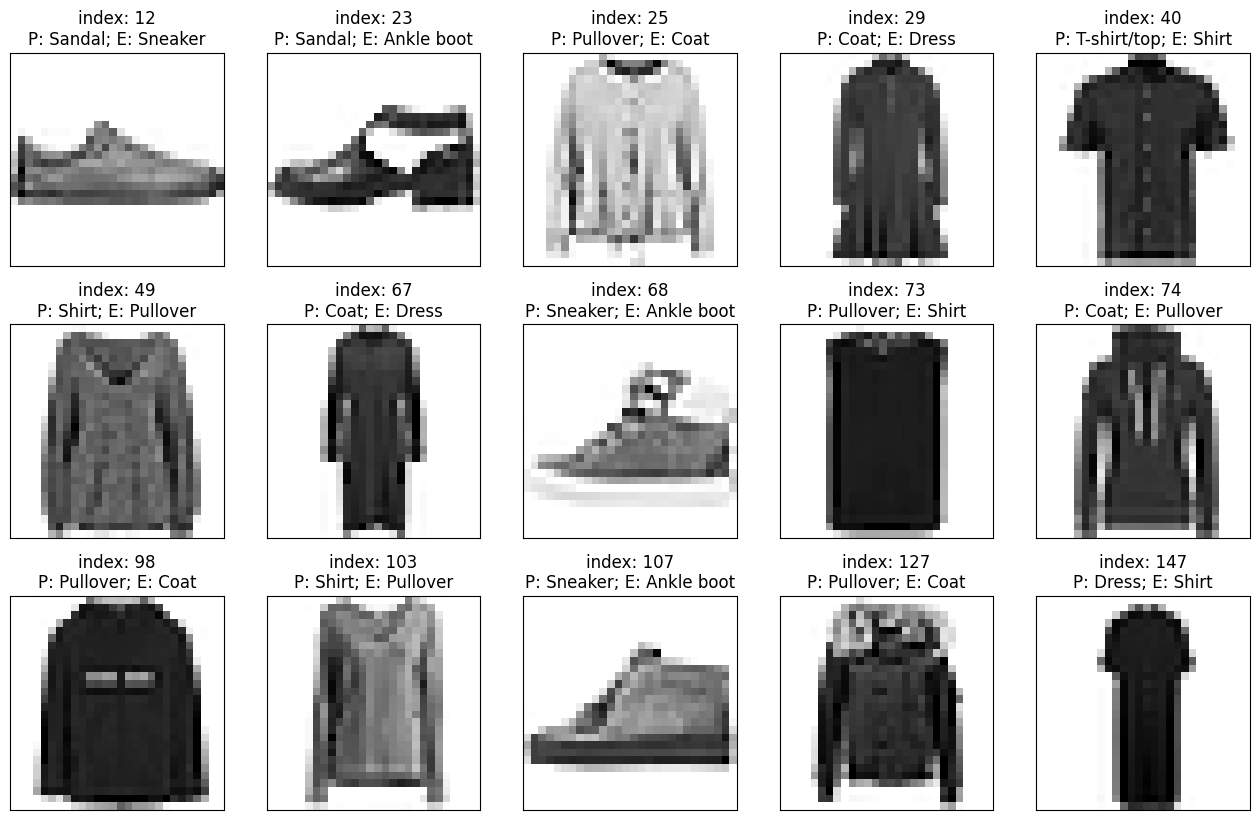

In [115]:
# See what the model got wrong
fig, axes = plt.subplots(ncols=5, nrows=3, figsize=(16,10))

for axes, item in zip(axes.ravel(), wrong_pred):
  ind, img, pred, exp = item
  axes.imshow(img, cmap=plt.cm.gray_r)
  axes.set_xticks([])  # remove x-axis tick marks
  axes.set_yticks([])  # remove y-axis tick marks
  axes.set_title(f'index: {ind}\nP: {fash_labels[pred]}; E: {fash_labels[exp]}')